# Proyek Analisis Data: Bike_sharing_dataset
- **Nama:** Ezar Alvah Rayhan
- **Email:** ezarrayhan2@gmail.com
- **ID Dicoding:** ezar_alvah_rayhan

## Menentukan Pertanyaan Bisnis

1. How has the trend of bike sharing been over the past two years?
2. How does the number of bikes rented differ each month?
3. How does the number of bikes rented differ each day?
4. How does the number of bikes rented on weekdays differ from those rented on holidays?
5. How does the season affect the number of bikes rented?
6. How does the weather affect the number of bikes rented?

## Install Semua Packages/Library yang Digunakan

In [99]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Import Semua Packages/Library yang Digunakan

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

## Data Gathering

In [101]:
hour = pd.read_csv('hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Data Assessing

**1. Checking Data Types**

In [102]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight :** There is a data type mismatch, where the column 'dteday' should be of type datetime, not object.

**2. Detecting Missing Value**

In [103]:
missing_value = hour.isnull().sum()
print(missing_value)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight :** There is no missing values detected on the dataset.

**3. Checking Duplicated Data**

In [104]:
print("Sum of duplicated data on the dataset : ", hour.duplicated().sum())

Sum of duplicated data on the dataset :  0


**Insight :** There is no duplicated data detected on the dataset.

## Data Cleaning

**1. Converting Data Type Missmatch**

In [105]:
hour['dteday'] = pd.to_datetime(hour['dteday'])
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight :** All data type are correct.

**2. Setting Numerical and Categorical Variables on the Dataset**

In [106]:
# Set Numerical Variable
numerical_var = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
numerical_var_df = hour[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]

# Set Categorical Variable
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
year_map = {0: '2011', 1: '2012'}
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
hour_map = {i: str(i + 1) for i in range(24)}  # 0:1, 1:2, ..., 23:24
holiday_map = {0: 'Not Holiday', 1: 'Holiday'}
weekday_map = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}
workingday_map = {0: 'Weekend or Holiday', 1: 'Working Day'}
weathersit_map = {
    1: 'Clear/ Few Clouds/ Partly Cloudy',
    2: 'Misty',
    3: 'Light Snow/ Light Rain/ Scattered Clouds',
    4: 'Heavy Rain/ Ice Pallets/ Snow + Fog'
}

# Replacing categorical value
hour['season'] = hour['season'].replace(season_map)
hour['yr'] = hour['yr'].replace(year_map)
hour['mnth'] = hour['mnth'].replace(month_map)
hour['hr'] = hour['hr'].replace(hour_map)
hour['holiday'] = hour['holiday'].replace(holiday_map)
hour['weekday'] = hour['weekday'].replace(weekday_map)
hour['workingday'] = hour['workingday'].replace(workingday_map)
hour['weathersit'] = hour['weathersit'].replace(weathersit_map)

print(hour)

       instant     dteday  season    yr      mnth  hr      holiday   weekday  \
0            1 2011-01-01  Spring  2011   January   1  Not Holiday  Saturday   
1            2 2011-01-01  Spring  2011   January   2  Not Holiday  Saturday   
2            3 2011-01-01  Spring  2011   January   3  Not Holiday  Saturday   
3            4 2011-01-01  Spring  2011   January   4  Not Holiday  Saturday   
4            5 2011-01-01  Spring  2011   January   5  Not Holiday  Saturday   
...        ...        ...     ...   ...       ...  ..          ...       ...   
17374    17375 2012-12-31  Spring  2012  December  20  Not Holiday    Monday   
17375    17376 2012-12-31  Spring  2012  December  21  Not Holiday    Monday   
17376    17377 2012-12-31  Spring  2012  December  22  Not Holiday    Monday   
17377    17378 2012-12-31  Spring  2012  December  23  Not Holiday    Monday   
17378    17379 2012-12-31  Spring  2012  December  24  Not Holiday    Monday   

               workingday              

**Insight :** Numerical and categorical variables in the dataset have been set.

**3. Removing Unused Variable**

In [107]:
hour.drop(columns=['instant'], inplace=True)
hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,January,1,Not Holiday,Saturday,Weekend or Holiday,Clear/ Few Clouds/ Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,January,2,Not Holiday,Saturday,Weekend or Holiday,Clear/ Few Clouds/ Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,January,3,Not Holiday,Saturday,Weekend or Holiday,Clear/ Few Clouds/ Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,January,4,Not Holiday,Saturday,Weekend or Holiday,Clear/ Few Clouds/ Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,January,5,Not Holiday,Saturday,Weekend or Holiday,Clear/ Few Clouds/ Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


**Insight :** Unused Variable 'instant' have been removed.

## Exploratory Data Analysis (EDA)

**1. Numerical Variable Descriptive Statistics**

In [108]:
numerical_stats = hour[numerical_var].describe()
numerical_stats

,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight :** Descriptive statistics about count, mean, standard deviation, minimal value, 25% value, 50% value, 75% value, and maximal value of each numerical variable are shown on the output table above.

**2. Categorical Variable Descriptive Statistics**

In [109]:
def categorical_stats(hour, column):
    freq = hour.groupby(column)['cnt'].sum()
    prop = (freq / hour['cnt'].sum()) * 100
    min_values = hour.groupby(column)['cnt'].min()
    max_values = hour.groupby(column)['cnt'].max()
    mean_values = hour.groupby(column)['cnt'].mean()
    
    result = pd.DataFrame({
        'Frequency': freq,
        'Proportion (%)': prop.round(2),
        'Min': min_values,
        'Max': max_values,
        'Mean': mean_values.round(2)
    }).sort_values(by='Frequency', ascending=False)
    
    return result

# Bike Sharing by Season
result_season = categorical_stats(hour, 'season')
print(result_season, '\n')

# Bike Sharing by Year
result_year = categorical_stats(hour, 'yr')
print(result_year, '\n')

# Bike Sharing by Month
result_month = categorical_stats(hour, 'mnth')
print(result_month, '\n')

# Bike Sharing by Holiday
result_holiday = categorical_stats(hour, 'holiday')
print(result_holiday, '\n')

# Bike Sharing by Days
result_days = categorical_stats(hour, 'weekday')
print(result_days, '\n')

# Bike Sharing by Working Days
result_work = categorical_stats(hour, 'workingday')
print(result_work, '\n')

# Bike Sharing by Weather
result_weather = categorical_stats(hour, 'weathersit')
print(result_weather, '\n')

        Frequency  Proportion (%)  Min  Max    Mean
season                                             
Fall      1061129           32.23    1  977  236.02
Summer     918589           27.90    1  957  208.34
Winter     841613           25.56    1  967  198.87
Spring     471348           14.32    1  801  111.11 

      Frequency  Proportion (%)  Min  Max    Mean
yr                                               
2012    2049576           62.25    1  977  234.67
2011    1243103           37.75    1  651  143.79 

           Frequency  Proportion (%)  Min  Max    Mean
mnth                                                  
August        351194           10.67    1  941  238.10
June          346342           10.52    1  900  240.52
September     345991           10.51    1  977  240.77
July          344948           10.48    1  913  231.82
May           331686           10.07    1  873  222.91
October       322352            9.79    1  963  222.16
April         269094            8.17    1  8

**Insight :** 
The category with the highest number of bike sharing for each variable is as follows: Season is Fall, Year is 2012, Month is August, Holiday status is Not Holiday, Weekday is Friday, Working Day status is Working Day, and Weather condition is Clear/Few Clouds/Partly Cloudy. (Other information is available in the output table above.)

## Time Segmented Analysis

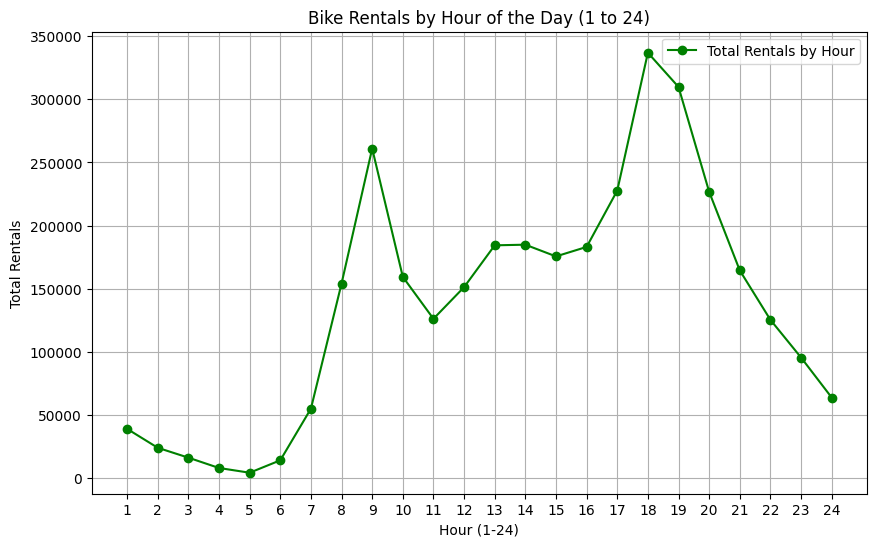

In [110]:
hour['hr'] = hour['hr'].astype(int)
hr_sorted = hour.sort_values(by='hr')

# Grouping by hour to analyze rentals by time of day
hourly_data = hr_sorted.groupby('hr').agg({
    'cnt': 'sum',  # Total rentals
    'temp': 'mean',  # Average temperature
}).reset_index()

# Adjust hr for x-axis from 1 to 24
hourly_data['hr'] = hourly_data['hr'].apply(lambda x: (x-1) + 1 if x < 24 else 24)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(hourly_data['hr'], hourly_data['cnt'], marker='o', label='Total Rentals by Hour', color='green')

# Customize x-axis to display hours from 1 to 24
plt.xticks(range(1, 25))  # Setting x-ticks from 1 to 24
plt.title('Bike Rentals by Hour of the Day (1 to 24)')
plt.xlabel('Hour (1-24)')
plt.ylabel('Total Rentals')
plt.legend()
plt.grid(True)
plt.show()

**Insight :** The bike rental pattern exhibits a clear trend throughout the day. Peak demand occurs in the morning around 8-9 AM. Another peak occurs in the afternoon around 5-6 PM. Conversely, bike demand tends to drop significantly in the middle of the night and early morning hours (around 1-5 AM), and experiences a temporary decline around noon (around 12-1 PM).

## Visualization & Explanatory Analysis

**Question #1 : How has the trend of bike sharing been over the past two years?**

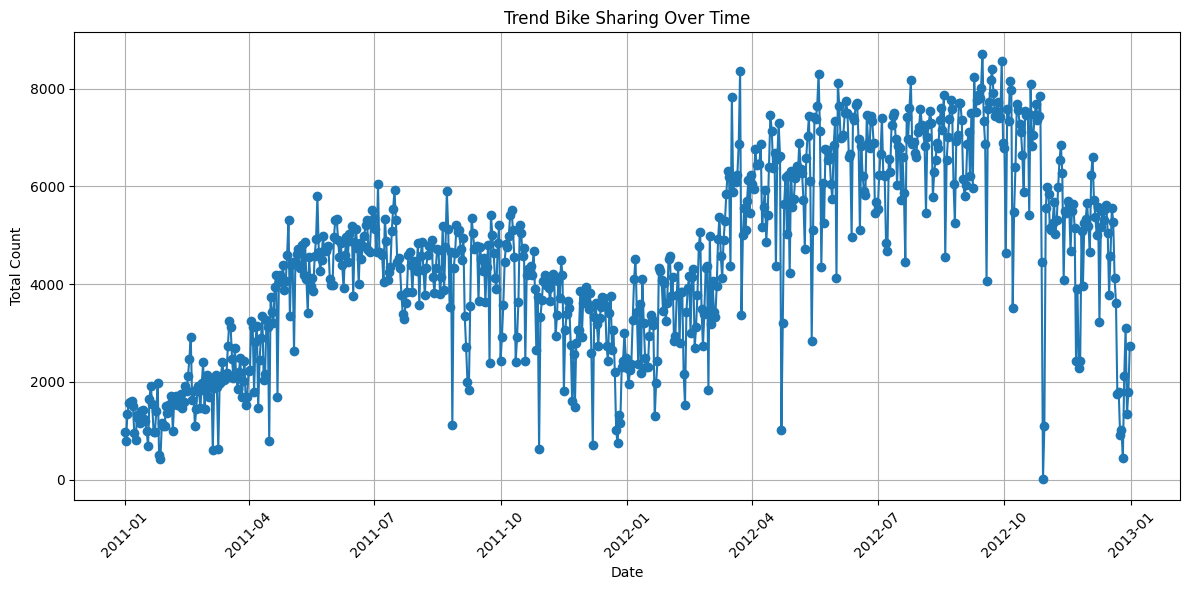

In [111]:
daily_counts = hour.groupby('dteday')['cnt'].sum()

plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Count')
plt.title('Trend Bike Sharing Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid()  # Add a grid for easier reading
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

**Insight :** The number of bike-sharing service uses fluctuated over time from the beginning of 2011 to the beginning of 2013. Overall, there is an upward trend in the total number of bike shares.

**Question #2 : How does the number of bikes rented differ each month?**

Text(0.5, 1.0, 'Number of bike sharing by month')

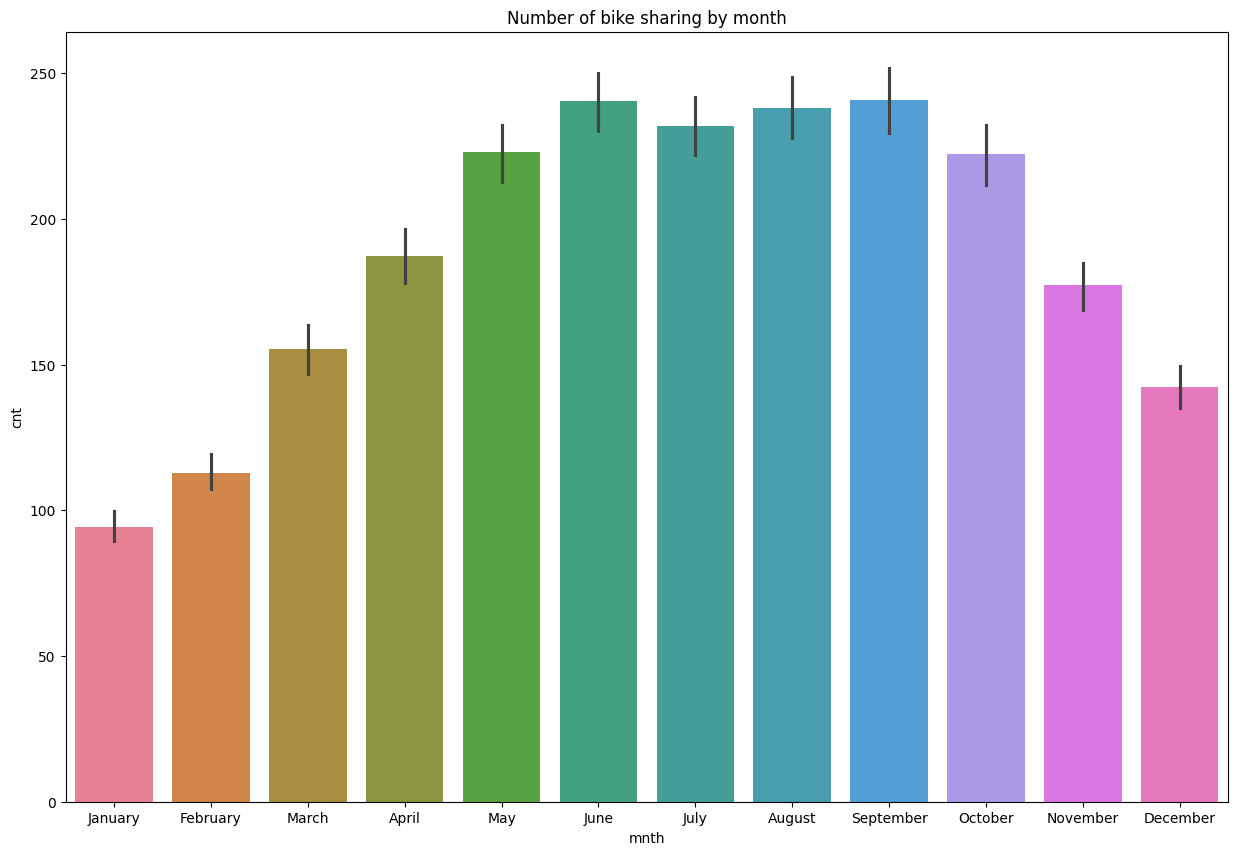

In [112]:
plt.figure(figsize=(15, 10))

sns.barplot(x="mnth", y="cnt", data= hour, hue="mnth")

plt.title("Number of bike sharing by month")

**Insight :** Overall, bike usage tends to increase from January, peaking in June and July. After that, the number of users decreases slightly but remains at a fairly high level until the end of the year.

**Question #3 : How does the number of bikes rented differ each day?**

Text(0.5, 1.0, 'Number of bike sharing by Days')

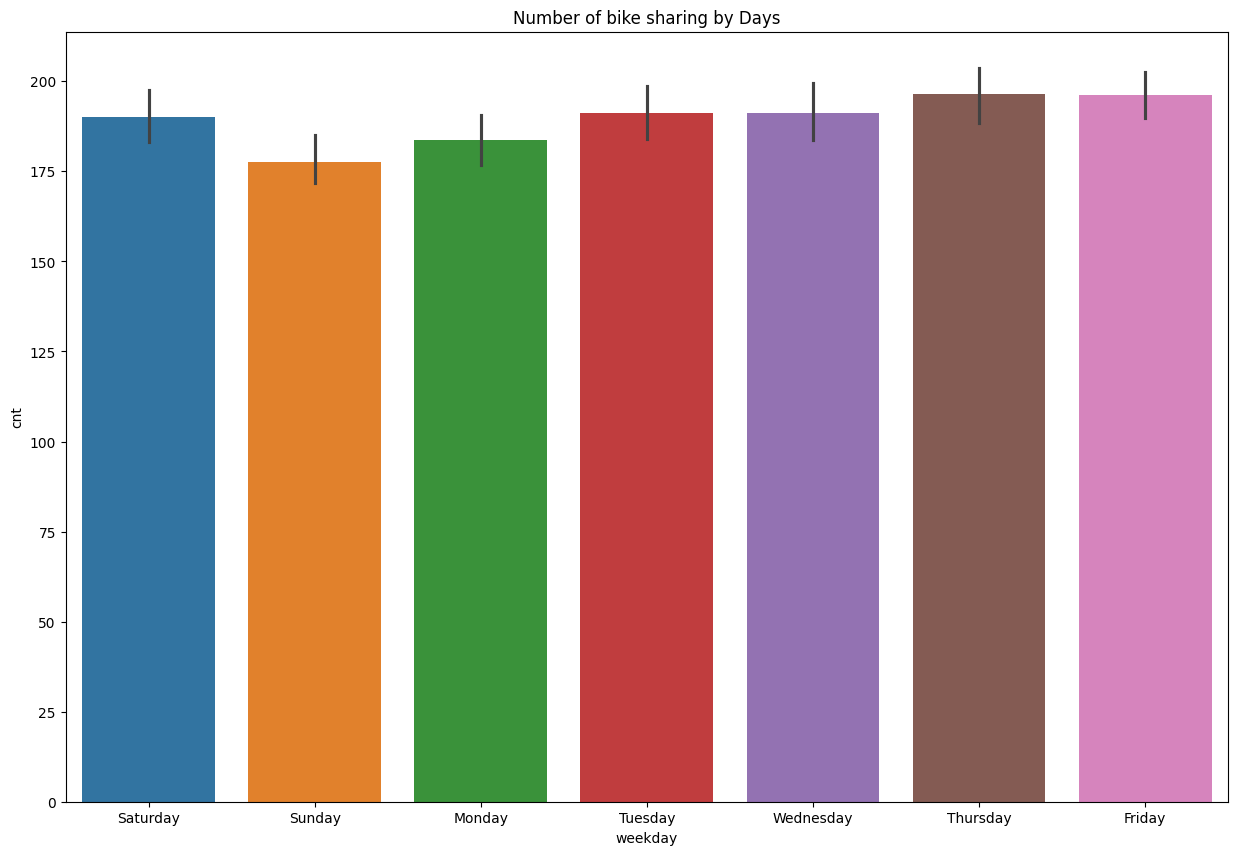

In [113]:
plt.figure(figsize=(15, 10))

sns.barplot(x="weekday", y="cnt", data= hour, hue="weekday")

plt.title("Number of bike sharing by Days")

**Insight :** Overall, bike usage is highest on Fridays and Thursdays, while the lowest bike usage is on Sundays.

**Question #4 : How does the number of bikes rented on weekdays differ from those rented on holidays?**

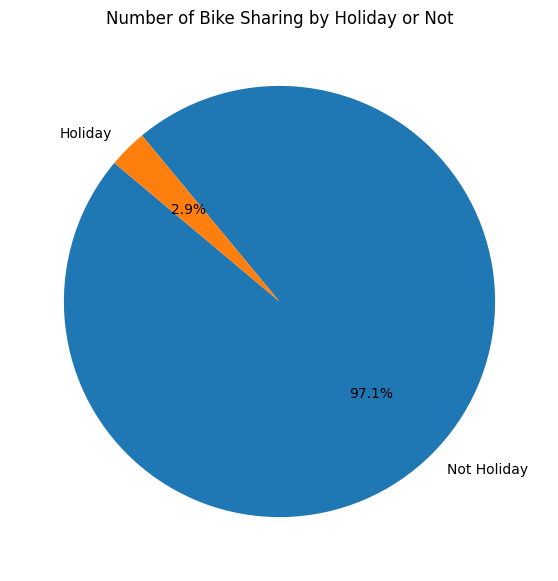

In [114]:
plt.figure(figsize=(7, 7))

holiday_counts = hour['holiday'].value_counts()

plt.pie(holiday_counts, labels=holiday_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Bike Sharing by Holiday or Not')
plt.show()

**Insight :** Bike sharing services are used significantly more on weekdays than on holidays.

**Question #5 : How does the season affect the number of bikes rented?**

Text(0.5, 1.0, 'Number of bike sharing by Season')

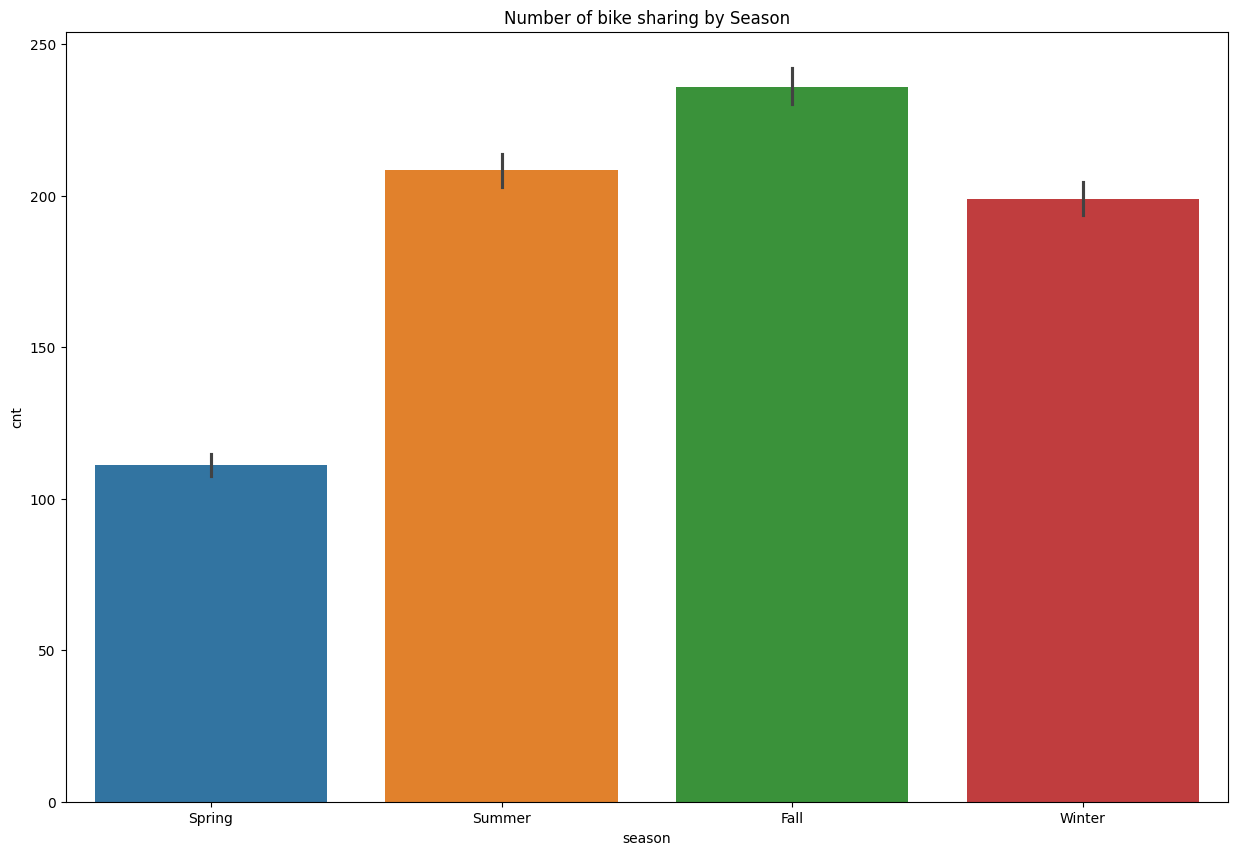

In [115]:
plt.figure(figsize=(15, 10))

sns.barplot(x="season", y="cnt", data= hour, hue="season")

plt.title("Number of bike sharing by Season")

**Insight :** The use of bike-sharing services is greatly influenced by the season. Fall is the season with the highest number of bike users, followed by summer and winter. Conversely, spring has the lowest number of bike users.

**Questin #6 : How does the weather affect the number of bikes rented?**

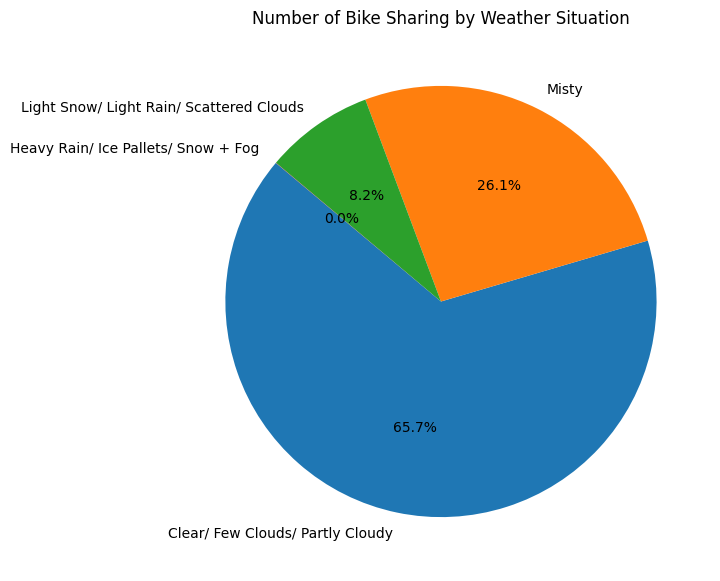

In [116]:
plt.figure(figsize=(7, 7))

weather_counts = hour['weathersit'].value_counts()

plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Bike Sharing by Weather Situation')
plt.show()

**Insight :** Sunny weather is the most preferred weather condition for bike-sharing service users, while bad weather tends to decrease people's interest in using this service.

## Conclusion

1. The number of bike-sharing service uses fluctuated over time from the beginning of 2011 to the beginning of 2013. Overall, there is an upward trend in the total number of bike shares.
2. Bike usage tends to increase from January, peaking in June and July. After that, the number of users decreases slightly but remains at a fairly high level until the end of the year.
3. Bike usage is highest on Fridays and Thursdays, while the lowest bike usage is on Sundays.
4. Bike sharing services are used significantly more on weekdays than on holidays.
5. Fall is the season with the highest number of bike users, followed by summer and winter. Conversely, spring has the lowest number of bike users.
6. Sunny weather is the most preferred weather condition for bike-sharing service users, while bad weather tends to decrease people's interest in using this service.